In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import sklearn

In [2]:
raw_data = pd.read_csv('DataFolder/trainset.csv')
raw_data.head()

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,pdays,poutcome,nr.employed,Subscribed
0,41,blue-collar,divorced,basic.4y,yes,no,telephone,may,mon,1575,1,999,nonexistent,5191.0,yes
1,49,entrepreneur,married,university.degree,yes,no,telephone,may,mon,1042,1,999,nonexistent,5191.0,yes
2,49,technician,married,basic.9y,no,no,telephone,may,mon,1467,1,999,nonexistent,5191.0,yes
3,41,technician,married,professional.course,yes,no,telephone,may,mon,579,1,999,nonexistent,5191.0,yes
4,45,blue-collar,married,basic.9y,yes,no,telephone,may,mon,461,1,999,nonexistent,5191.0,yes


# Data Cleaning Process

#### Data Exploration


In [3]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29271 entries, 0 to 29270
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          29271 non-null  int64  
 1   job          29271 non-null  object 
 2   marital      29271 non-null  object 
 3   education    29271 non-null  object 
 4   housing      29271 non-null  object 
 5   loan         29271 non-null  object 
 6   contact      29271 non-null  object 
 7   month        29271 non-null  object 
 8   day_of_week  29271 non-null  object 
 9   duration     29271 non-null  int64  
 10  campaign     29271 non-null  int64  
 11  pdays        29271 non-null  int64  
 12  poutcome     29271 non-null  object 
 13  nr.employed  29271 non-null  float64
 14  Subscribed   29271 non-null  object 
dtypes: float64(1), int64(4), object(10)
memory usage: 3.3+ MB


In [4]:
# covert unknown Data to np.Nan
raw_data = raw_data.replace('unknown',np.nan)
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29271 entries, 0 to 29270
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          29271 non-null  int64  
 1   job          29011 non-null  object 
 2   marital      29220 non-null  object 
 3   education    28044 non-null  object 
 4   housing      28558 non-null  object 
 5   loan         28558 non-null  object 
 6   contact      29271 non-null  object 
 7   month        29271 non-null  object 
 8   day_of_week  29271 non-null  object 
 9   duration     29271 non-null  int64  
 10  campaign     29271 non-null  int64  
 11  pdays        29271 non-null  int64  
 12  poutcome     29271 non-null  object 
 13  nr.employed  29271 non-null  float64
 14  Subscribed   29271 non-null  object 
dtypes: float64(1), int64(4), object(10)
memory usage: 3.3+ MB


In [5]:
# Check Empty Data
raw_data["job"].unique()
raw_data.isna().sum()

age               0
job             260
marital          51
education      1227
housing         713
loan            713
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
poutcome          0
nr.employed       0
Subscribed        0
dtype: int64

In [6]:
#Check no of unknown
raw_data = raw_data.dropna(subset=["job","marital","education","housing","loan"])
raw_data.isna().sum()

age            0
job            0
marital        0
education      0
housing        0
loan           0
contact        0
month          0
day_of_week    0
duration       0
campaign       0
pdays          0
poutcome       0
nr.employed    0
Subscribed     0
dtype: int64

In [7]:
#Data drop is around 7%. The remaining dataset is as follow
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27178 entries, 0 to 29270
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          27178 non-null  int64  
 1   job          27178 non-null  object 
 2   marital      27178 non-null  object 
 3   education    27178 non-null  object 
 4   housing      27178 non-null  object 
 5   loan         27178 non-null  object 
 6   contact      27178 non-null  object 
 7   month        27178 non-null  object 
 8   day_of_week  27178 non-null  object 
 9   duration     27178 non-null  int64  
 10  campaign     27178 non-null  int64  
 11  pdays        27178 non-null  int64  
 12  poutcome     27178 non-null  object 
 13  nr.employed  27178 non-null  float64
 14  Subscribed   27178 non-null  object 
dtypes: float64(1), int64(4), object(10)
memory usage: 3.3+ MB


In [8]:
#Ratio on Subscribed
ratio =  (raw_data['Subscribed'].value_counts()['no']/raw_data['Subscribed'].value_counts().sum())*100
ratio

89.07204356464787

In [9]:
#CheckPoint
check_point = raw_data.copy()

# Data Visualization

## before encoding

In [10]:
data_categorical = check_point.select_dtypes(include='object')
data_numeric = check_point.select_dtypes(include='int64')
col_cat = data_categorical.columns 
col_num = data_numeric.columns

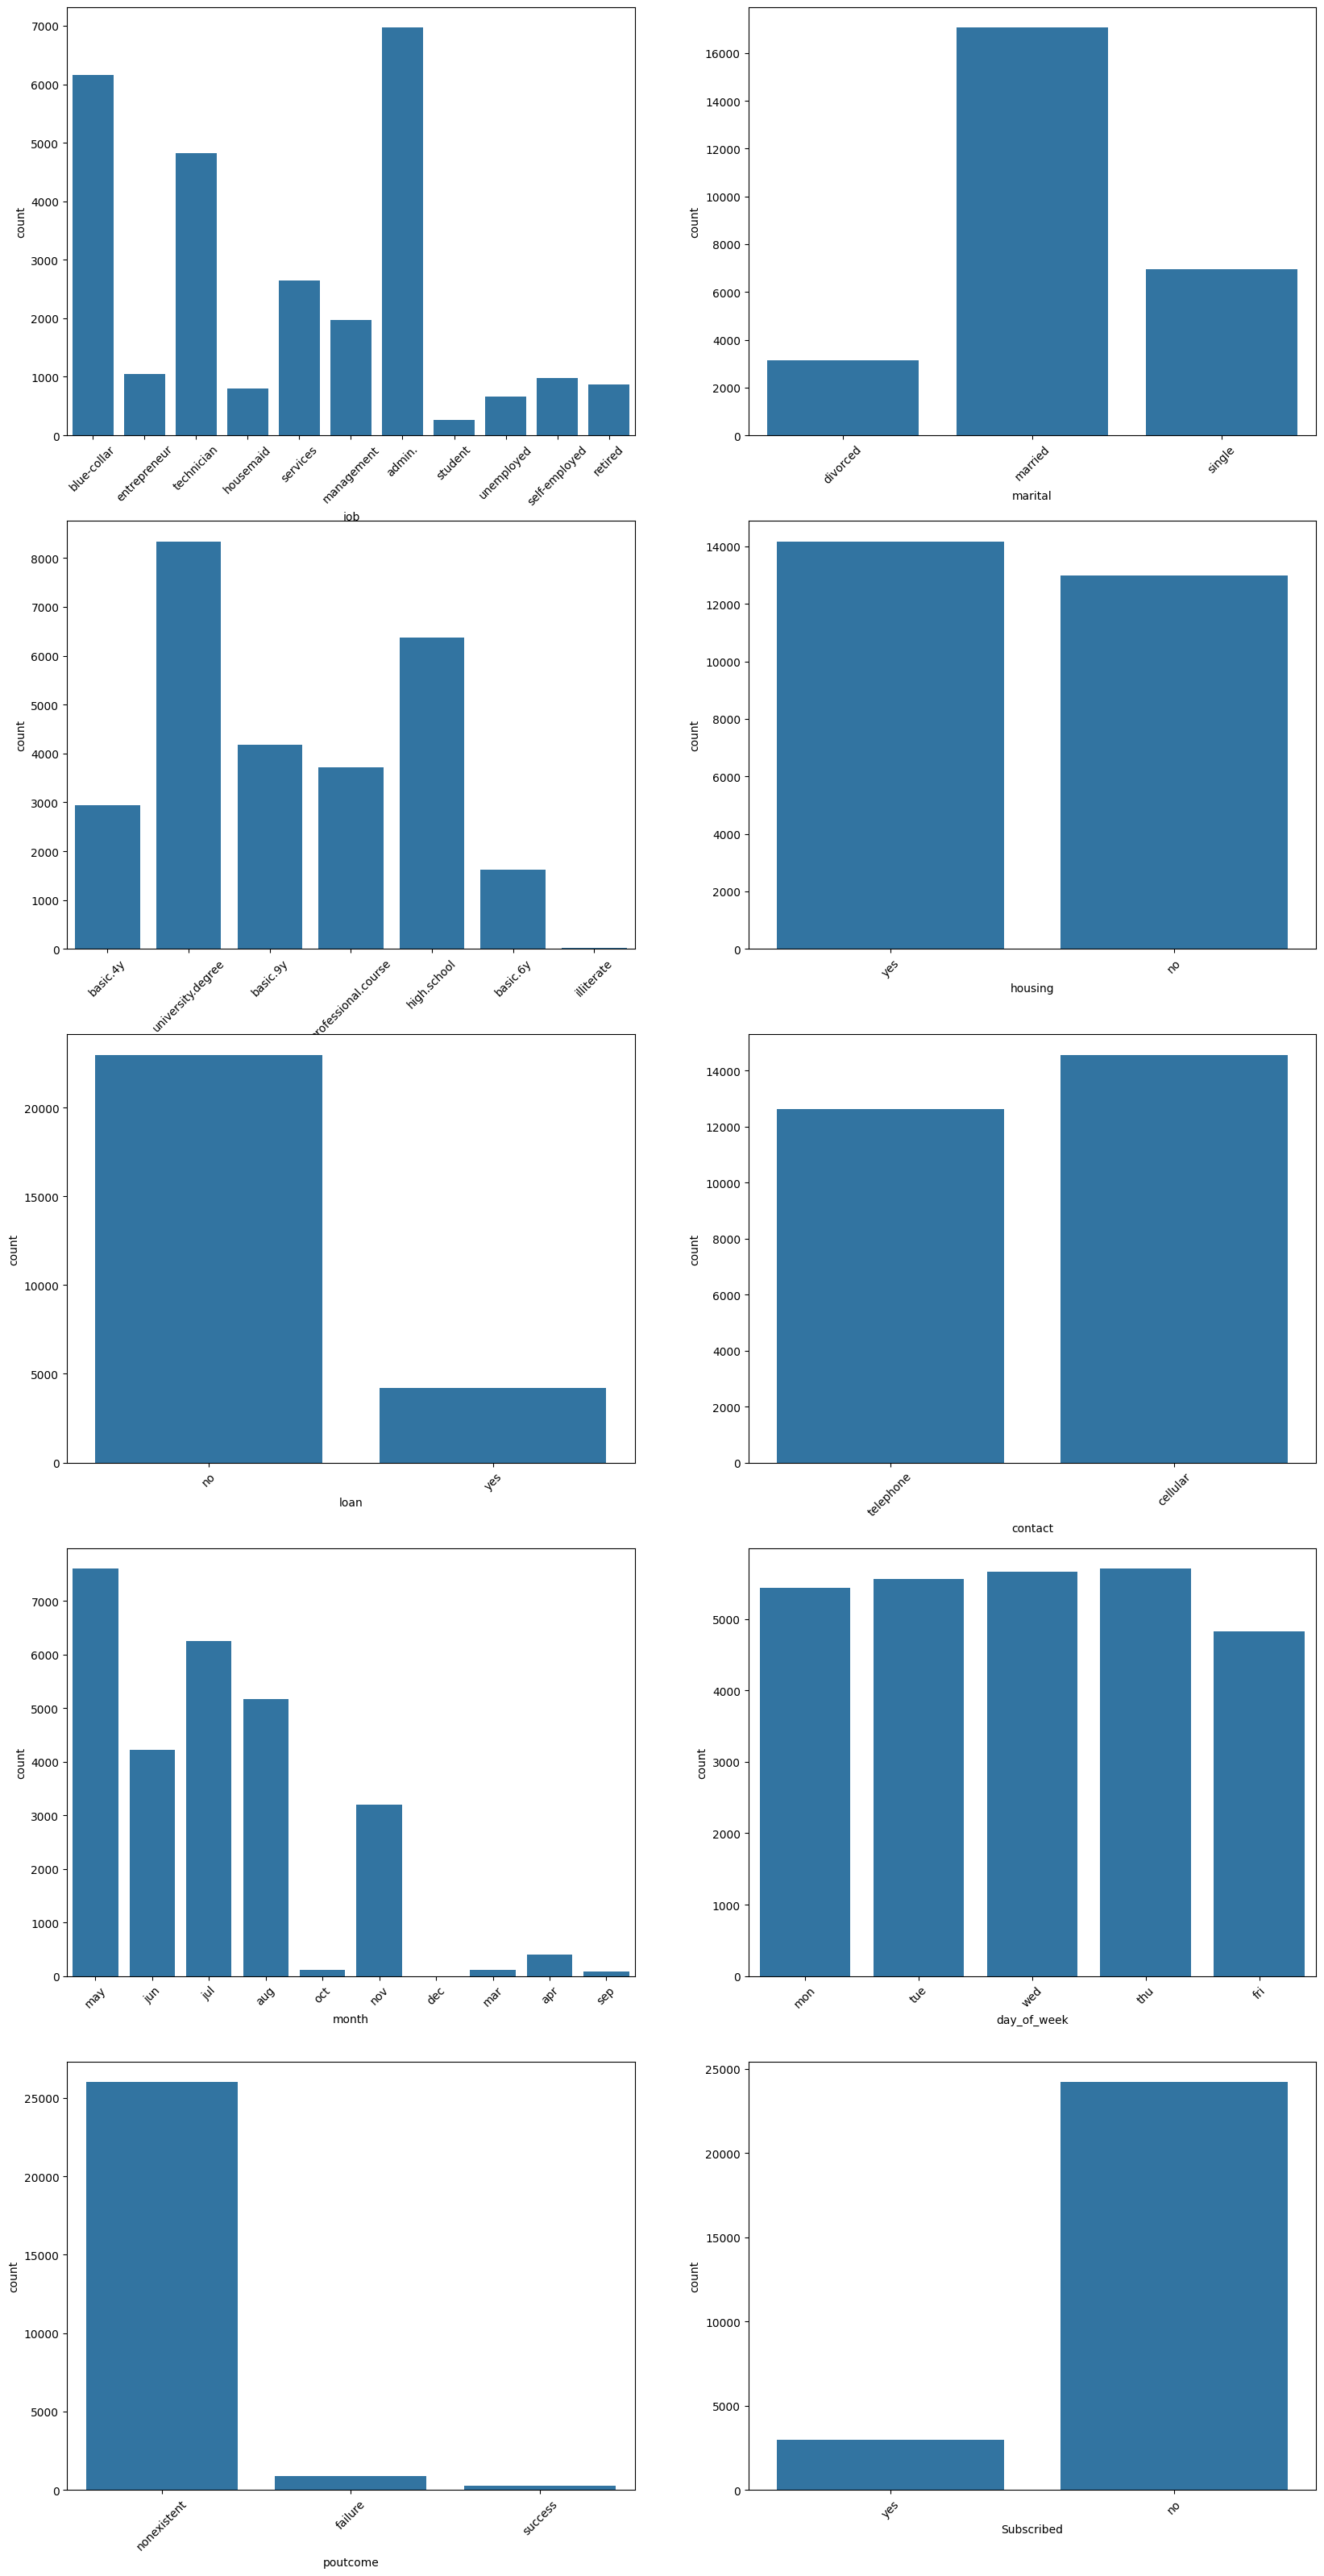

In [11]:
n = len(col_cat)
fig, ax = plt.subplots(5, 2, figsize = (20,40), sharey = False)
axes = ax.flatten()

for i in range(0,n):
    sns.countplot(data = check_point, x = col_cat[i], ax = axes[i])
    axes[i].tick_params(axis='x', rotation=45)

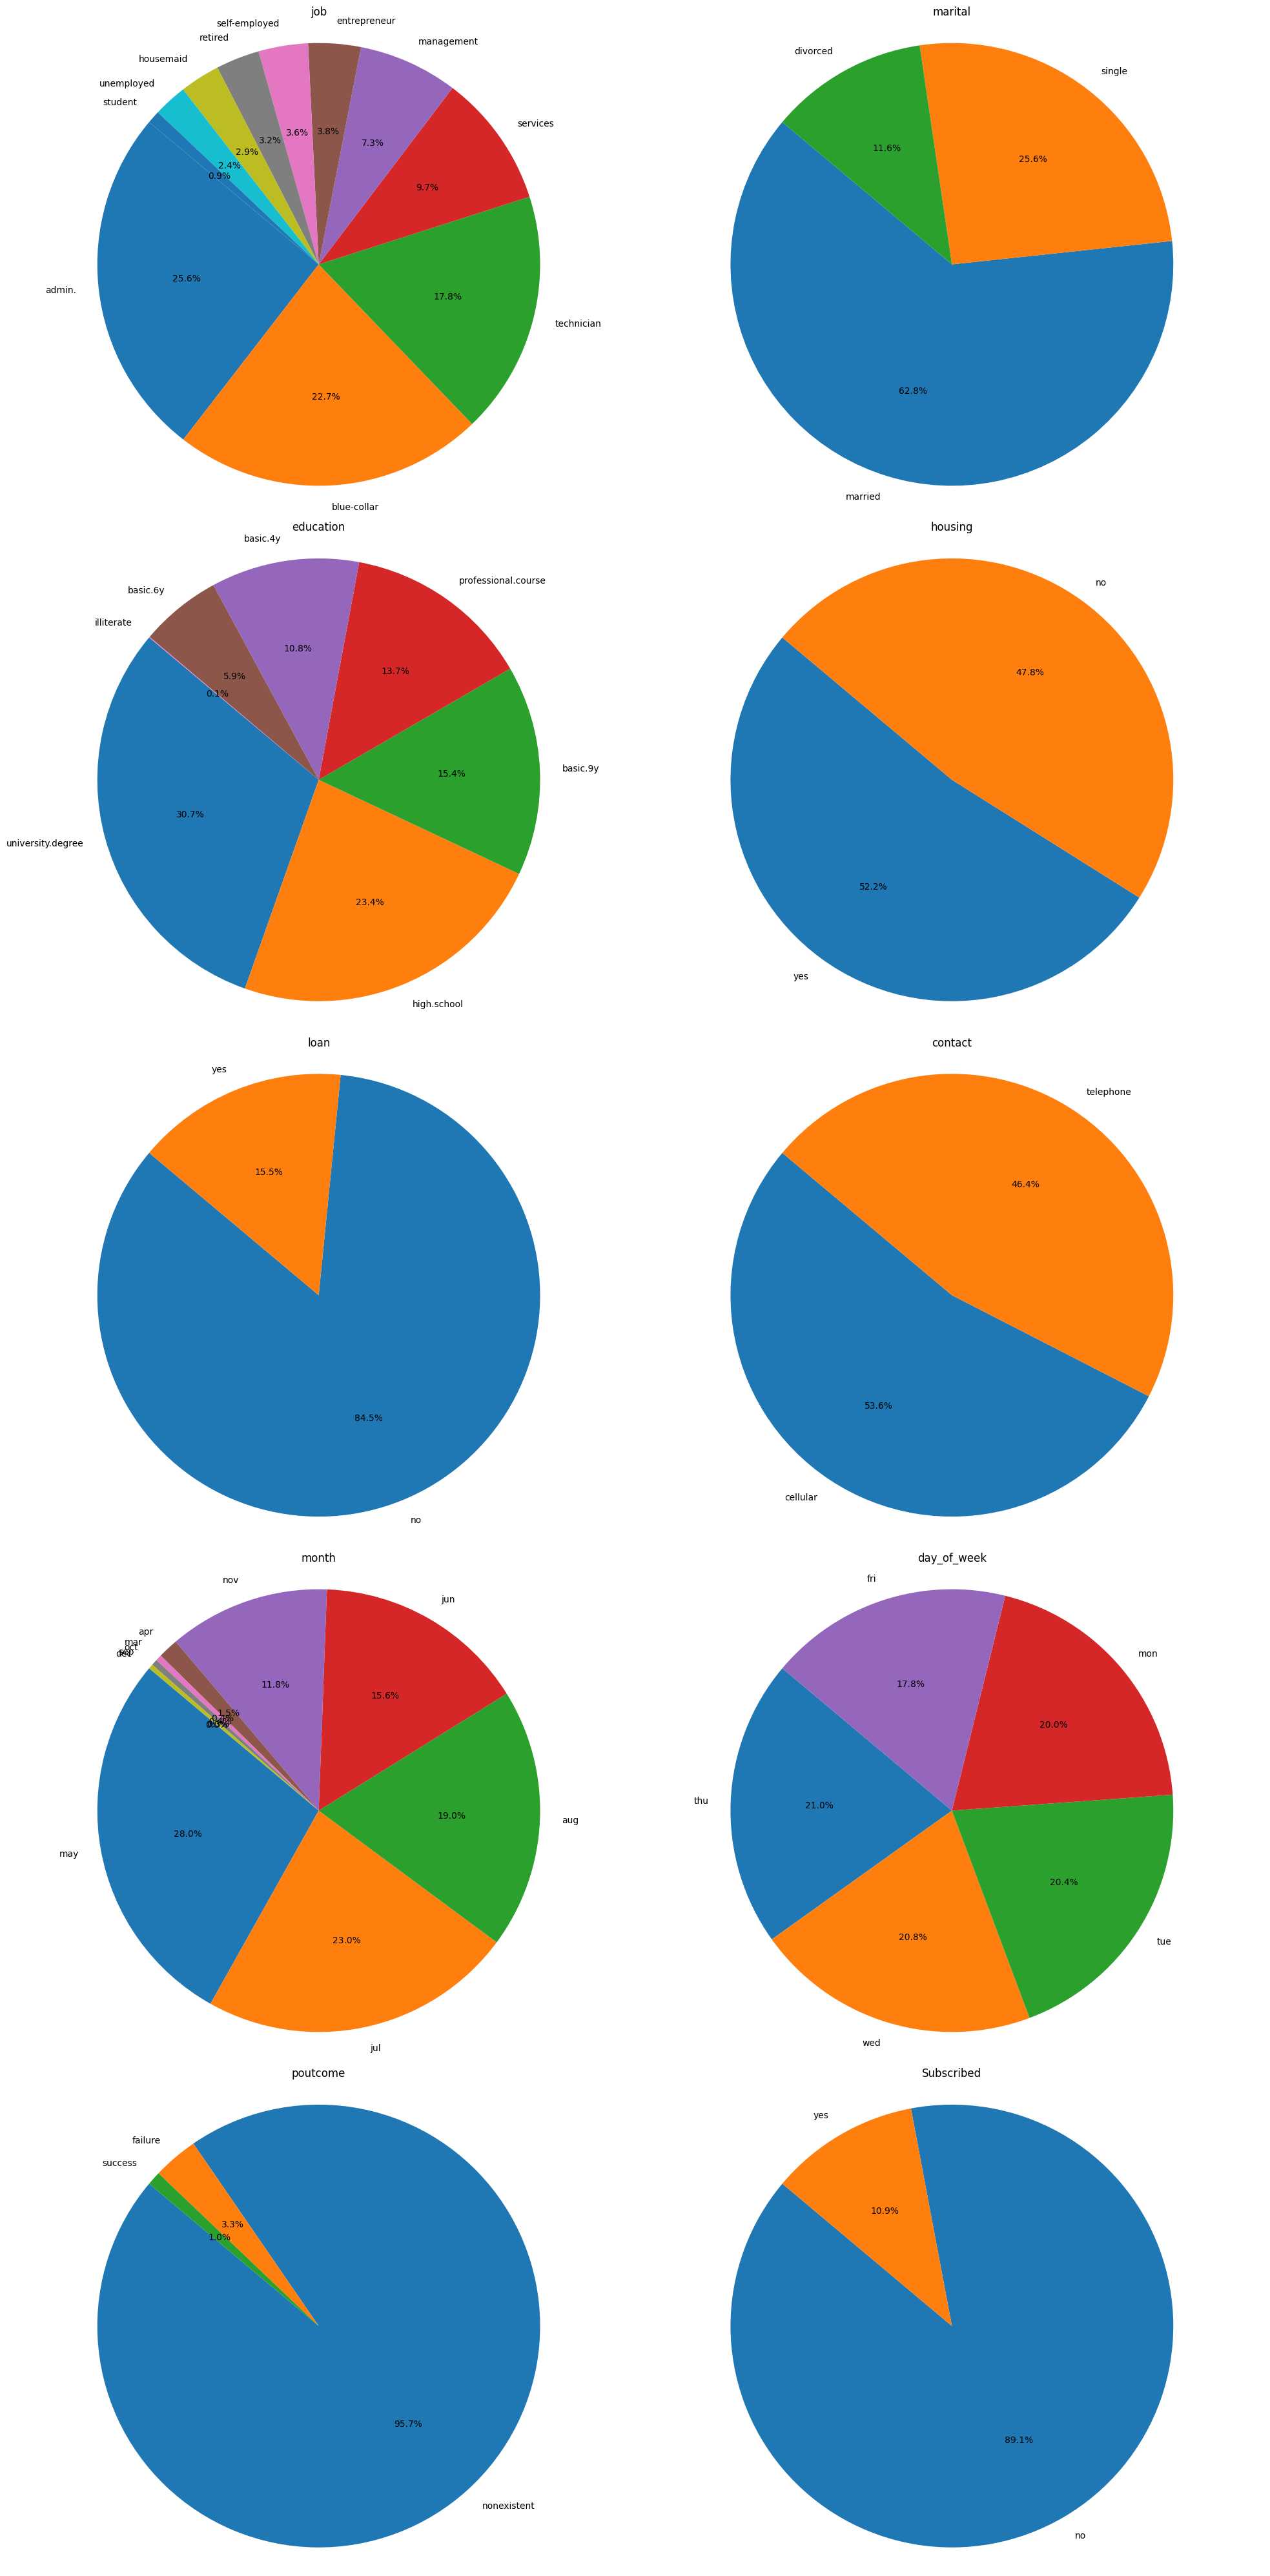

In [12]:
# Assuming check_point is your DataFrame and col_cat is a list of categorical column names
n = len(col_cat)
fig, ax = plt.subplots(5, 2, figsize=(20, 40), sharey=False)
axes = ax.flatten()

for i in range(0, n):
    # Calculate value counts for the categorical column
    counts = check_point[col_cat[i]].value_counts()
    # Plot pie chart
    axes[i].pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140)
    axes[i].set_title(col_cat[i])  # Set title for the subplot
    axes[i].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

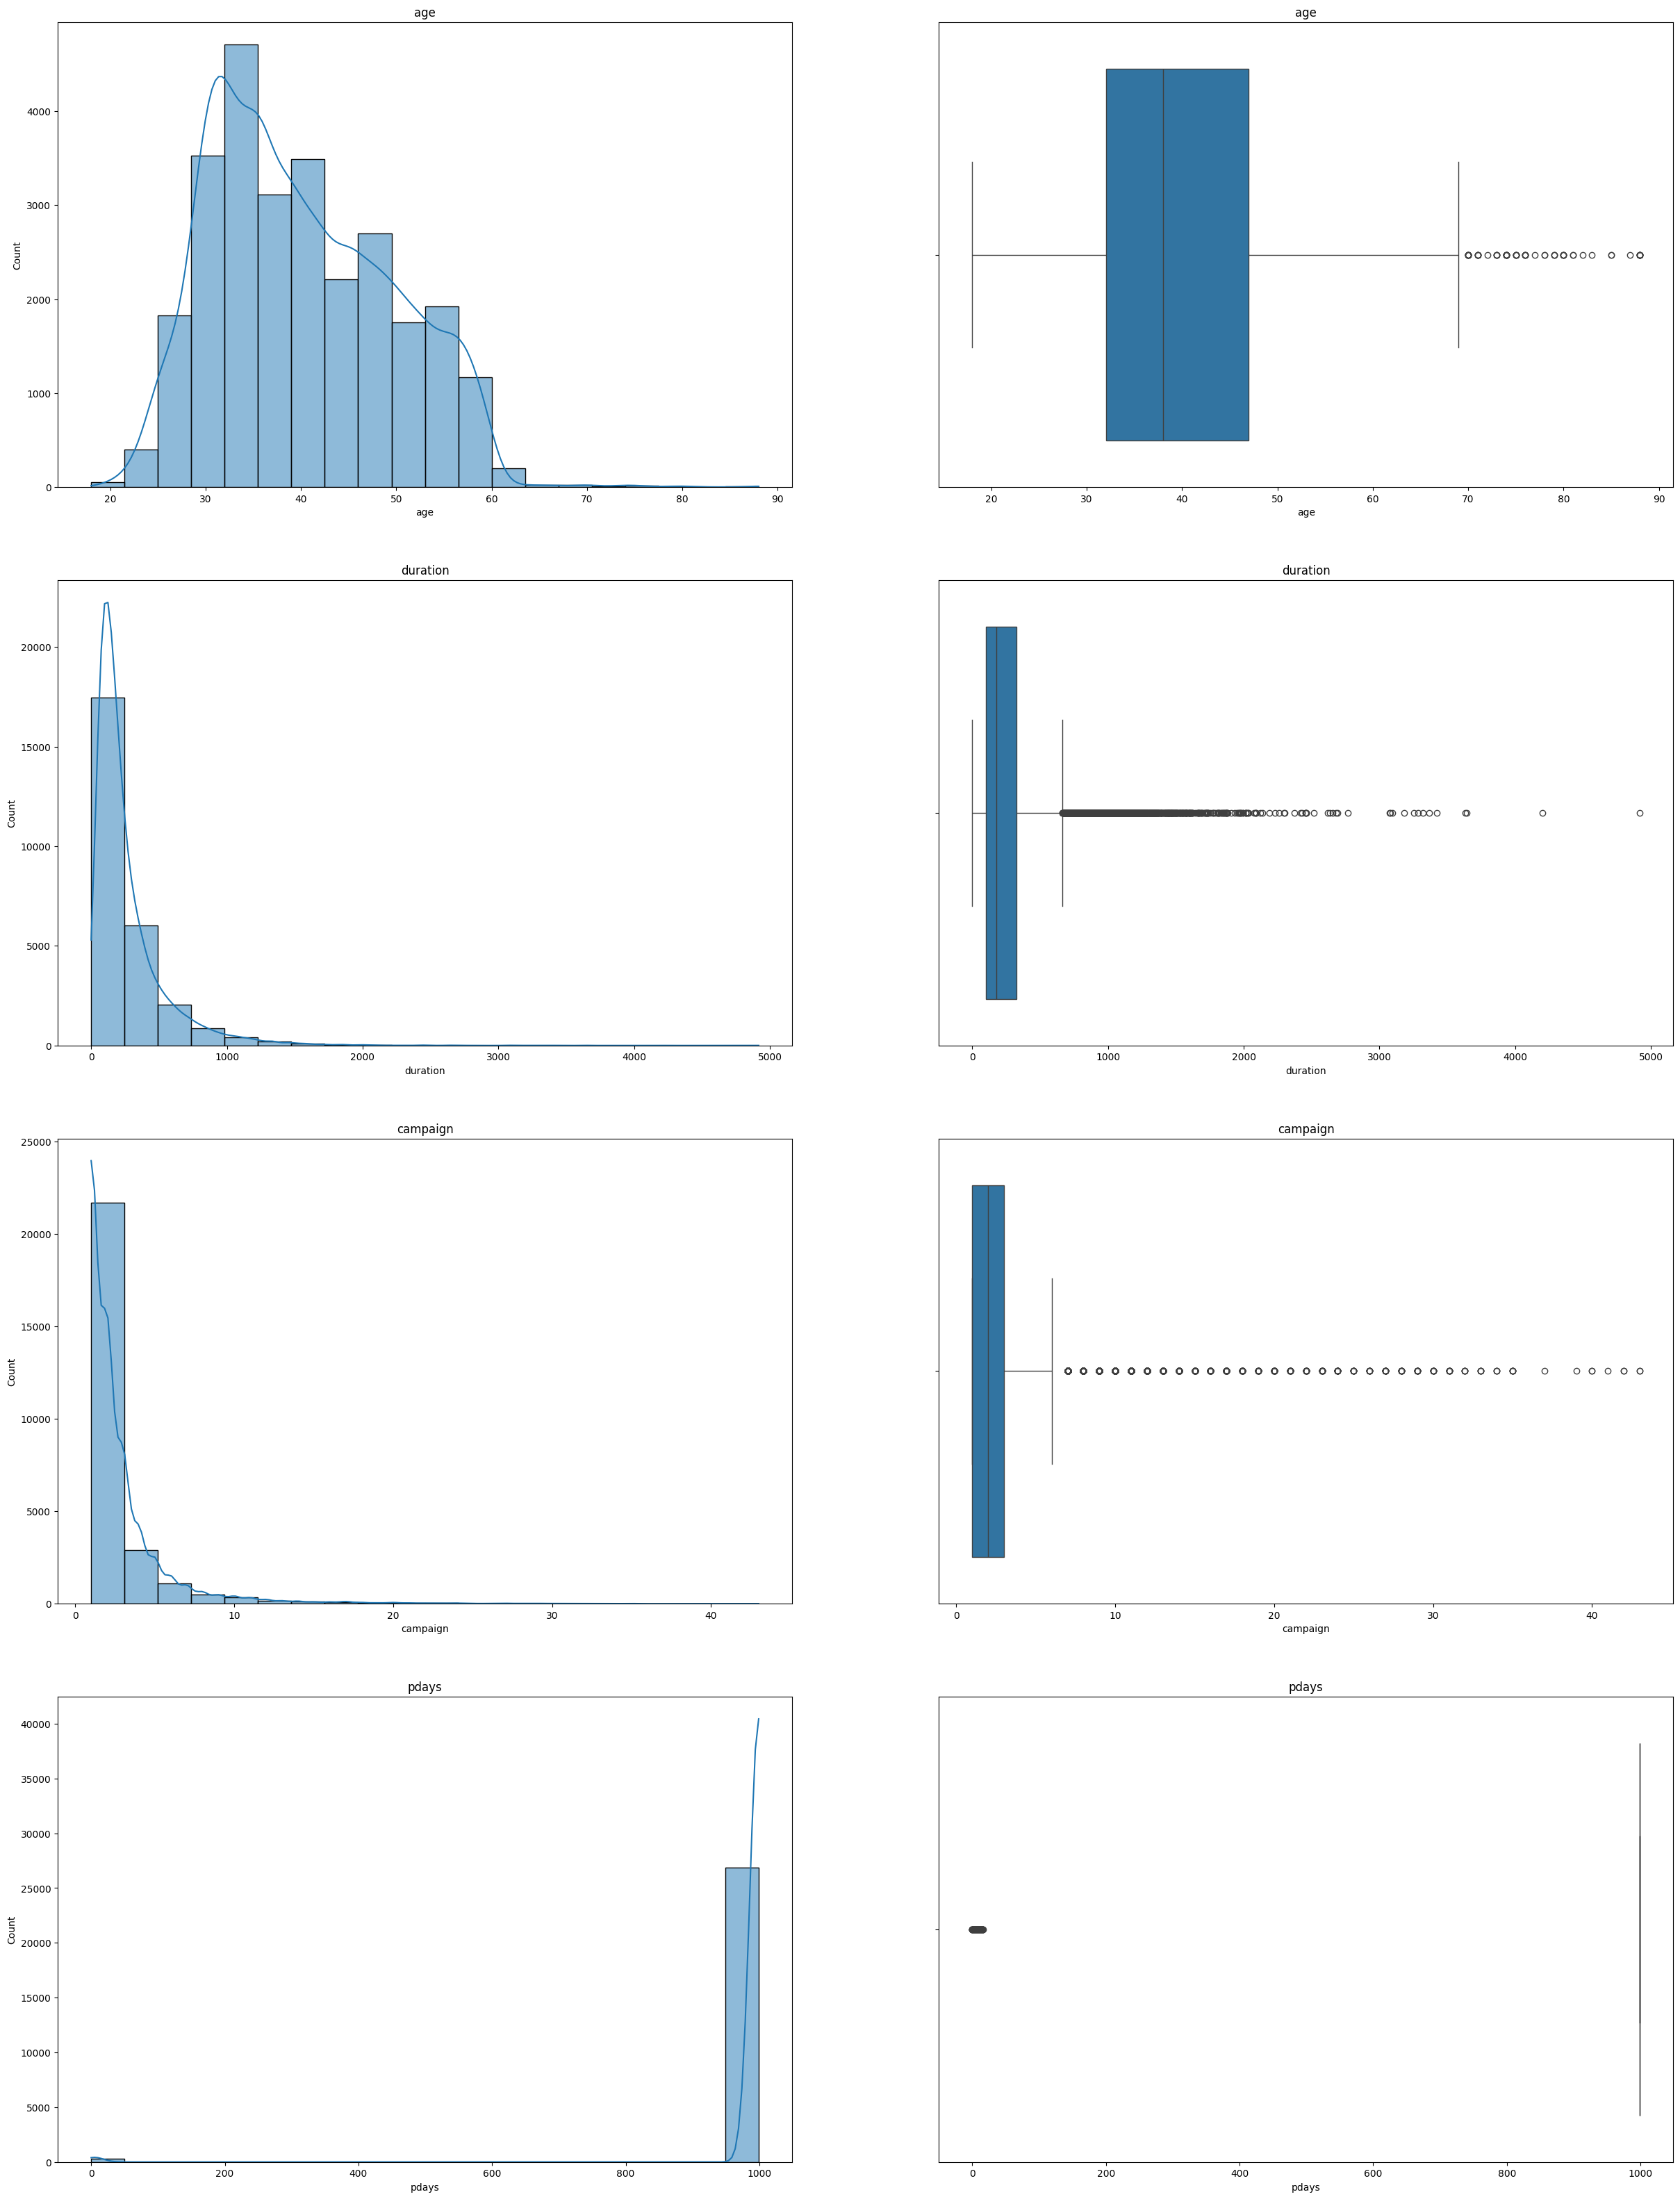

In [13]:
n = len(col_num)

fig, axes = plt.subplots(n, 2, figsize=(15*2,10*n), sharey=False)
for i in range(0,n):
    sns.histplot(data=check_point,x=col_num[i],bins=20, kde = True, ax=axes[i,0])
    axes[i,0].set_title(col_num[i])
    
    sns.boxplot(x = check_point[col_num[i]], ax = axes[i,1])
    axes[i,1].set_title(col_num[i])

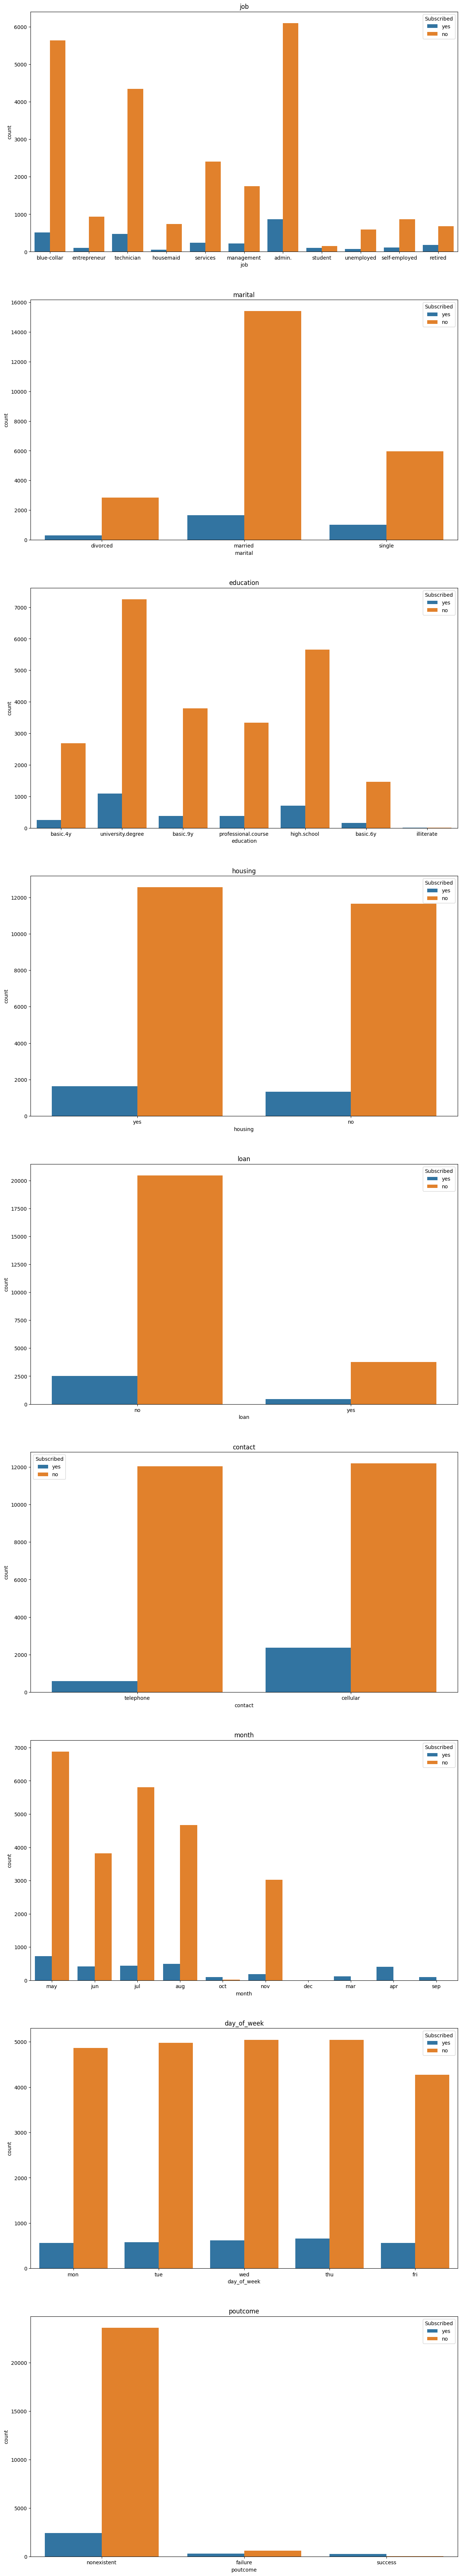

In [14]:
n = col_cat.shape[0]-1
fig, axes = plt.subplots(n, figsize=(15,10*n), sharey=False)

for i in range(0,n):
    sns.countplot(data=check_point, x=col_cat[i], hue='Subscribed',ax = axes[i]) 
    axes[i].set_title(col_cat[i])

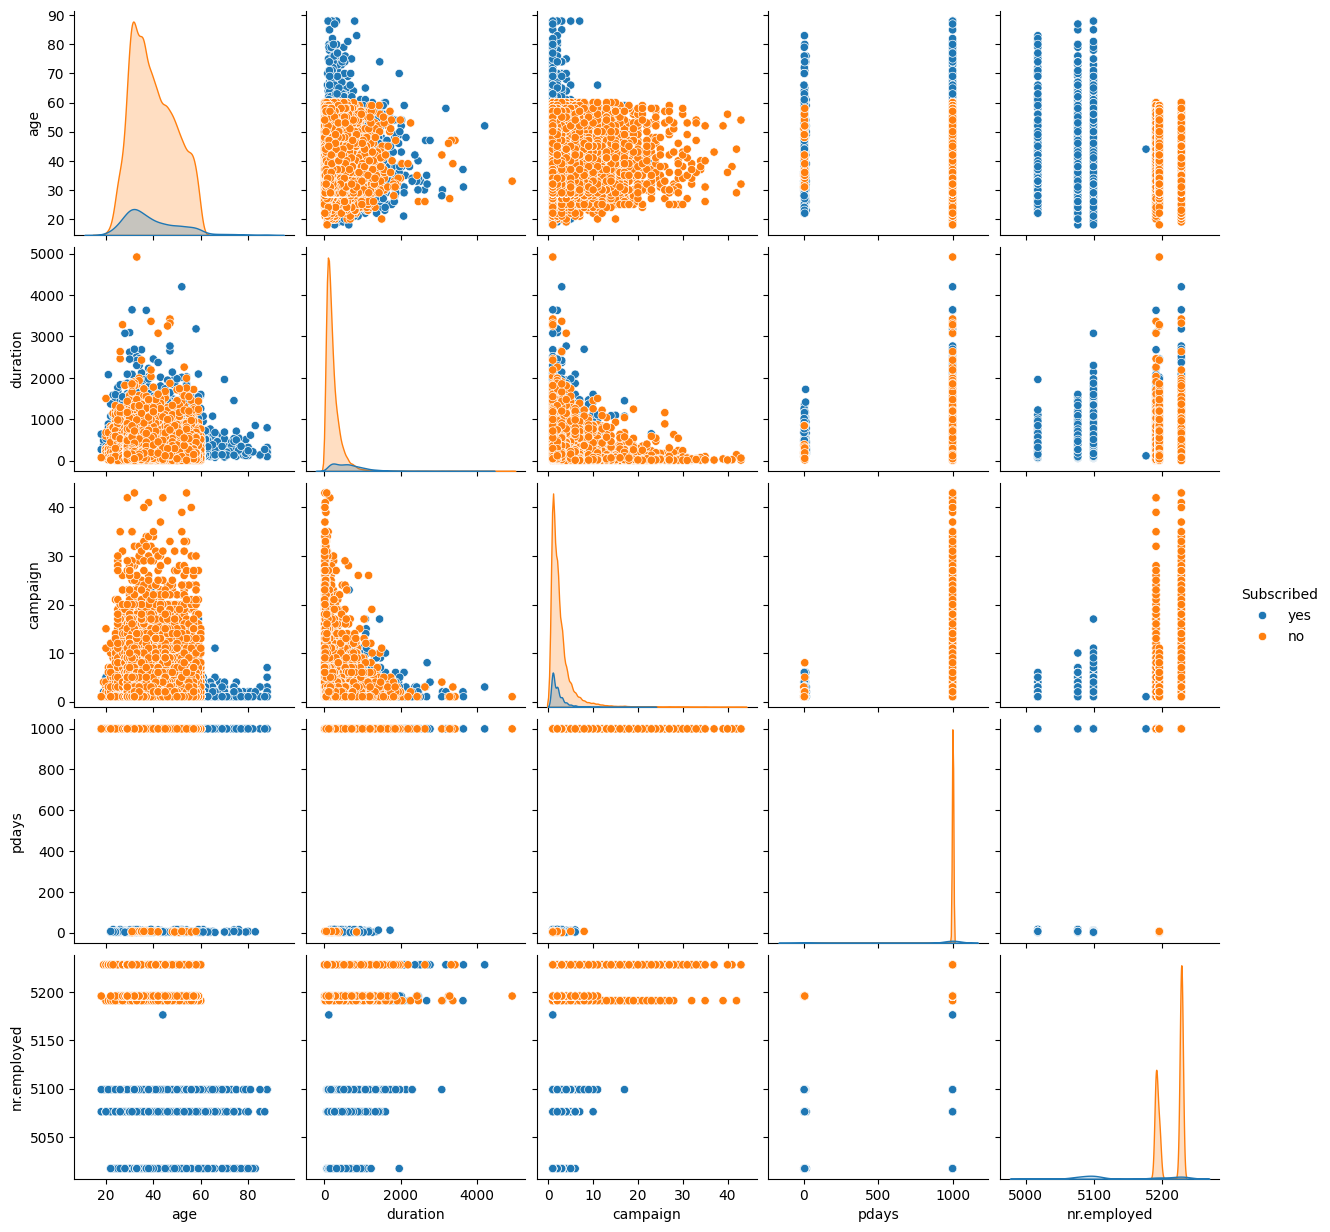

In [15]:
sns.pairplot(check_point, hue = 'Subscribed', dropna= True)


## Encoding

In [16]:
from sklearn.preprocessing import LabelEncoder


# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Perform label encoding for each categorical column
for col in data_categorical:
    check_point[col] = label_encoder.fit_transform(check_point[col])

# Display the updated dataset with label-encoded categorical variables
print("After Label Encoding:")
print(check_point.head())

After Label Encoding:
   age  job  marital  education  housing  loan  contact  month  day_of_week  \
0   41    1        0          0        1     0        1      6            1   
1   49    2        1          6        1     0        1      6            1   
2   49    9        1          2        0     0        1      6            1   
3   41    9        1          5        1     0        1      6            1   
4   45    1        1          2        1     0        1      6            1   

   duration  campaign  pdays  poutcome  nr.employed  Subscribed  
0      1575         1    999         1       5191.0           1  
1      1042         1    999         1       5191.0           1  
2      1467         1    999         1       5191.0           1  
3       579         1    999         1       5191.0           1  
4       461         1    999         1       5191.0           1  


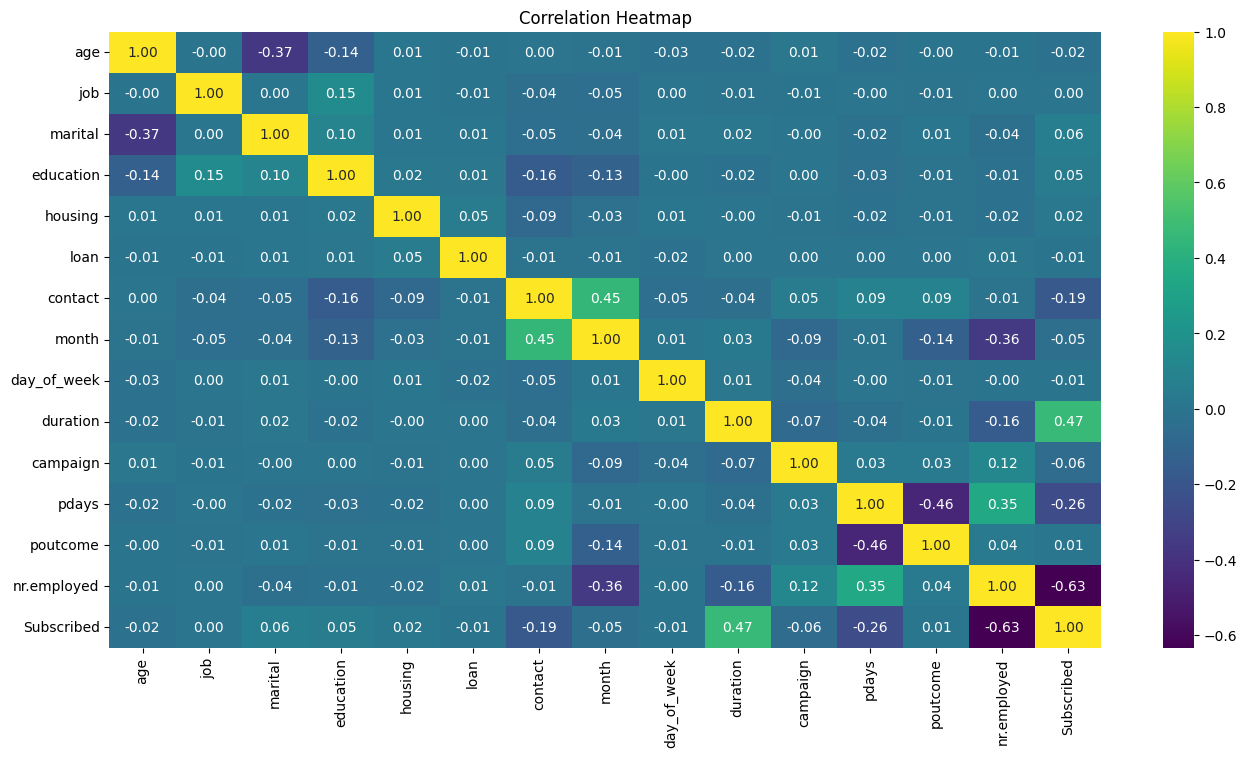

In [17]:
corr_matrix = check_point.corr()

# Set the size of the plot
plt.figure(figsize=(16, 8))

# Create the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='viridis', fmt='.2f')

# Add title
plt.title('Correlation Heatmap')

# Display the plot
plt.show()